# Assignment-1
# Predictive problem of Eating-out Problem
# u3221708


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import ast
import plotly.express as px

import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

# PART-A:  Importing and Understanding the Data


In [73]:
# load data from the file  and storing in "Sydney_food_df" 
data_path = "zomato_df_final_data.csv"        #storing csv in data_path variable
Sydney_food_df = pd.read_csv(data_path)       # reading of CSV file
Sydney_food_df.head()                         #showing the data-set



address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [74]:
Sydney_food_df.shape 

(10500, 17)

In [75]:
#As we can see that our data-set containing 10500 rows and 17 columns.

In [76]:
Sydney_food_df.isnull().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In this dataset manny of the variable having Null values

### 1a. How Many Unique Cuisines are served in Sydny restaurants.

In [77]:
print(Sydney_food_df.cuisine) # printing cusine column 

0         ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']
1        ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']
2                                       ['Japanese']
3                              ['Modern Australian']
4                                  ['Thai', 'Salad']
                            ...                     
10495                                    ['Chinese']
10496                                  ['Beverages']
10497                                      ['Sushi']
10498                                      ['Sushi']
10499                                       ['Thai']
Name: cuisine, Length: 10500, dtype: object


In [78]:
# As this variable contains contains list ,to find its unique value we are finding its unique value 

Sydney_food_df["cuisine"] = Sydney_food_df["cuisine"].apply(eval) #applying eval function 


def get_unique_cuisine(Cuisine_clm):
 return pd.Series([x for c_list in Cuisine_clm for x in c_list ])

In [79]:
unique_cuisine=get_unique_cuisine(Sydney_food_df['cuisine']).value_counts() # getting unique count and storing in "unique_cuisine"
print ("Total no of unique restaurent are "+str(len(unique_cuisine) )+" .") # printing unique quisine 



Total no of unique restaurent are 134 .


# As we can see that In sydney there are total  134 Unique restaurent.

In [80]:
RowsToPlot = 35 #### 
fig = px.bar(unique_cuisine.head(7) , x =unique_cuisine.index , y = unique_cuisine.values)
fig.layout.title.text = 'Unique number of restaurants'
fig.layout.xaxis.title.text = 'Cusines name'
fig.layout.yaxis.title.text = 'Number of restaurent having cuisine'
fig.update_xaxes(tickangle = 300)
fig.show()

### 1b. Which Subhurbs (Top3) has the highest number of restaurants.


In [81]:
#question 2
top_subhurb_res=Sydney_food_df['subzone'].value_counts(dropna=False).nlargest(3) #getting top 3 highest number of restaurent

top_subhurb_res # Printing Top-3 subhurbs that having restaurent


CBD            476
Surry Hills    260
Parramatta     225
Name: subzone, dtype: int64

In [137]:
fig = px.bar( x =top_subhurb_res.index, y = top_subhurb_res.values)
fig.layout.title.text = 'Top 3-Suburbs with highest number of Restaurants'
fig.layout.xaxis.title.text = 'Suburbs Names in Sydney'
fig.layout.yaxis.title.text = ' Total no Of Restaurants'
fig.update_xaxes(tickangle = 300)

fig.update_traces(marker_color='teal')

                            # Graphical representation of Top-3 suburbs in sydney


### 1C. Support for agreement / disagreement on this statement: “Restaurants with ‘excellent’ rating are mostly very  expensive while those with ‘Poor’ rating are rarely expensive”

In [83]:
#question3

rating_demo=Sydney_food_df.groupby("rating_text").agg(mean_cost=('cost', 'mean')).reset_index().sort_values('mean_cost')

rating_demo # data frame on the basis of rating_txt and mean cost
#As we can see that average rating has less mean price than poor

rating_text   mean_cost
0     Average   51.021267
3        Poor   55.845771
2        Good   59.528114
4   Very Good   71.515810
1   Excellent  101.666667

In [134]:
fig = px.bar(rating_demo, x ='rating_text', y = 'mean_cost',color="rating_text")
fig.layout.title.text = 'Cost based on rating_text'
fig.layout.xaxis.title.text = 'rating_text'
fig.layout.yaxis.title.text = ' mean'
fig.update_xaxes(tickangle = 300)



# Restaurants with ‘excellent’ rating are mostly very expensive while those with ‘Poor’ rating are rarely expensive"

##By seeing this graphical representation as we can clearly see that "Average" rating has mean cost 51.02 ,where as "poor" rating has mean cost 55.86 ,If we are comparing all the ratings then Average rating has lowest cost.

##on the other hand if it is only "excellent" and "poor" rating ,than "Excellent" rating restaurant are expensive one. 

### 2. Perform exploratory data analysis for the Cost, Rating and Type

###EDA of cost 
--------------------------------

In [85]:
##cost rating type EDA

#cost :since it's a numerical variable so we will find 
#checking NA variable

Sydney_food_df["cost"].isnull().sum() #it has 346 NA values

346

In [86]:
Sydney_food_df["cost"].describe()  #view summary statistics of this variable

count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Text(0, 0.5, 'cost')

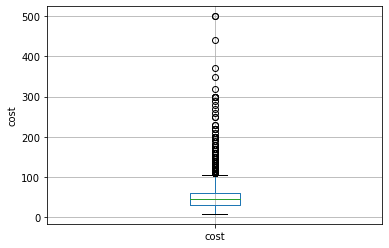

In [87]:
#box-plot of cost variable 

fig = Sydney_food_df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('cost')


#As we can see that there are so many outlier in "cost" variable.

Text(0.5, 0, 'cost')

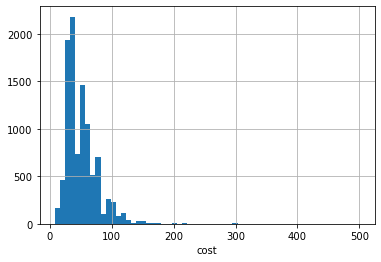

In [88]:
fig = Sydney_food_df['cost'].hist(bins=60)
fig.set_xlabel('cost')


#By seeing the "cost" variable histogram  .It is not normaliased ,it is right-skewed.For regression we have to normalise this variable by taking log

In [89]:
# Find aoutliers in "cost" variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = Sydney_food_df[variable].quantile(0.75) - Sydney_food_df[variable].quantile(0.25)
    Lower_boundary = Sydney_food_df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = Sydney_food_df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(Sydney_food_df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [90]:
_,_,_ = find_outliers('cost')

cost outliers are values < -60.0 or > 150.0


# EDA of "type" variable


In [91]:
Sydney_food_df['type'] # exploring type variable

0             ['Casual Dining']
1                      ['Café']
2               ['Fine Dining']
3        ['Fine Dining', 'Bar']
4             ['Casual Dining']
                  ...          
10495         ['Casual Dining']
10496                   ['Bar']
10497            ['Food Court']
10498            ['Food Court']
10499         ['Casual Dining']
Name: type, Length: 10500, dtype: object

In [92]:
#Exploring inside the "type" variable  
#as we can clearly see that it is having string , to get each values 1st we have to convert into list then we can get seprate value
for i, l in enumerate(Sydney_food_df["type"]):
    print(i)
    print(l)
    print("list",i,"is",type(l))

0
['Casual Dining']
list 0 is <class 'str'>
1
['Café']
list 1 is <class 'str'>
2
['Fine Dining']
list 2 is <class 'str'>
3
['Fine Dining', 'Bar']
list 3 is <class 'str'>
4
['Casual Dining']
list 4 is <class 'str'>
5
['Casual Dining', 'Dessert Parlour']
list 5 is <class 'str'>
6
['Casual Dining']
list 6 is <class 'str'>
7
['Casual Dining']
list 7 is <class 'str'>
8
['Fine Dining', 'Wine Bar']
list 8 is <class 'str'>
9
['Casual Dining']
list 9 is <class 'str'>
10
['Fine Dining']
list 10 is <class 'str'>
11
['Casual Dining']
list 11 is <class 'str'>
12
['Casual Dining']
list 12 is <class 'str'>
13
['Casual Dining']
list 13 is <class 'str'>
14
['Fine Dining']
list 14 is <class 'str'>
15
['Café']
list 15 is <class 'str'>
16
['Café']
list 16 is <class 'str'>
17
['Casual Dining']
list 17 is <class 'str'>
18
['Café']
list 18 is <class 'str'>
19
['Fine Dining']
list 19 is <class 'str'>
20
['Casual Dining']
list 20 is <class 'str'>
21
['Casual Dining', 'Wine Bar']
list 21 is <class 'str'>
22
['C

list 377 is <class 'str'>
378
['Café']
list 378 is <class 'str'>
379
['Casual Dining', 'Café']
list 379 is <class 'str'>
380
['Casual Dining']
list 380 is <class 'str'>
381
['Café']
list 381 is <class 'str'>
382
['Bar']
list 382 is <class 'str'>
383
['Casual Dining', 'Wine Bar']
list 383 is <class 'str'>
384
['Casual Dining']
list 384 is <class 'str'>
385
['Casual Dining']
list 385 is <class 'str'>
386
['Casual Dining', 'Bar']
list 386 is <class 'str'>
387
['Casual Dining']
list 387 is <class 'str'>
388
['Café']
list 388 is <class 'str'>
389
['Fine Dining']
list 389 is <class 'str'>
390
['Café']
list 390 is <class 'str'>
391
['Casual Dining']
list 391 is <class 'str'>
392
['Café']
list 392 is <class 'str'>
393
['Casual Dining']
list 393 is <class 'str'>
394
['Casual Dining']
list 394 is <class 'str'>
395
['Casual Dining']
list 395 is <class 'str'>
396
['Casual Dining']
list 396 is <class 'str'>
397
['Casual Dining']
list 397 is <class 'str'>
398
['Bakery', 'Café']
list 398 is <class 's

list 642 is <class 'str'>
643
['Casual Dining']
list 643 is <class 'str'>
644
['Café']
list 644 is <class 'str'>
645
['Casual Dining']
list 645 is <class 'str'>
646
['Café']
list 646 is <class 'str'>
647
['Casual Dining']
list 647 is <class 'str'>
648
['Café', 'Bakery']
list 648 is <class 'str'>
649
['Casual Dining', 'Bar']
list 649 is <class 'str'>
650
['Casual Dining']
list 650 is <class 'str'>
651
['Café']
list 651 is <class 'str'>
652
['Café']
list 652 is <class 'str'>
653
['Casual Dining']
list 653 is <class 'str'>
654
['Casual Dining']
list 654 is <class 'str'>
655
['Café']
list 655 is <class 'str'>
656
['Casual Dining']
list 656 is <class 'str'>
657
['Café']
list 657 is <class 'str'>
658
['Dessert Parlour', 'Café']
list 658 is <class 'str'>
659
['Café', 'Bakery']
list 659 is <class 'str'>
660
['Casual Dining']
list 660 is <class 'str'>
661
['Casual Dining']
list 661 is <class 'str'>
662
['Casual Dining', 'Bar']
list 662 is <class 'str'>
663
['Casual Dining', 'Wine Bar']
list 663

list 932 is <class 'str'>
933
['Casual Dining', 'Wine Bar']
list 933 is <class 'str'>
934
['Casual Dining']
list 934 is <class 'str'>
935
['Café']
list 935 is <class 'str'>
936
['Casual Dining']
list 936 is <class 'str'>
937
['Café']
list 937 is <class 'str'>
938
['Casual Dining']
list 938 is <class 'str'>
939
['Casual Dining']
list 939 is <class 'str'>
940
['Casual Dining']
list 940 is <class 'str'>
941
['Casual Dining', 'Bar']
list 941 is <class 'str'>
942
['Casual Dining']
list 942 is <class 'str'>
943
['Café']
list 943 is <class 'str'>
944
['Casual Dining']
list 944 is <class 'str'>
945
['Casual Dining', 'Bar']
list 945 is <class 'str'>
946
['Casual Dining']
list 946 is <class 'str'>
947
['Bar']
list 947 is <class 'str'>
948
['Casual Dining']
list 948 is <class 'str'>
949
['Fast Food']
list 949 is <class 'str'>
950
['Café']
list 950 is <class 'str'>
951
['Café']
list 951 is <class 'str'>
952
['Café']
list 952 is <class 'str'>
953
['Bar', 'Casual Dining']
list 953 is <class 'str'>
9

['Casual Dining', 'Wine Bar']
list 1297 is <class 'str'>
1298
['Fast Food']
list 1298 is <class 'str'>
1299
['Casual Dining']
list 1299 is <class 'str'>
1300
['Casual Dining']
list 1300 is <class 'str'>
1301
['Casual Dining']
list 1301 is <class 'str'>
1302
['Casual Dining']
list 1302 is <class 'str'>
1303
['Casual Dining']
list 1303 is <class 'str'>
1304
['Pub']
list 1304 is <class 'str'>
1305
['Casual Dining']
list 1305 is <class 'str'>
1306
['Casual Dining', 'Bar']
list 1306 is <class 'str'>
1307
['Café']
list 1307 is <class 'str'>
1308
['Casual Dining']
list 1308 is <class 'str'>
1309
['Casual Dining']
list 1309 is <class 'str'>
1310
['Casual Dining']
list 1310 is <class 'str'>
1311
['Casual Dining', 'Bar']
list 1311 is <class 'str'>
1312
['Casual Dining']
list 1312 is <class 'str'>
1313
['Café']
list 1313 is <class 'str'>
1314
['Café']
list 1314 is <class 'str'>
1315
['Café']
list 1315 is <class 'str'>
1316
['Casual Dining']
list 1316 is <class 'str'>
1317
['Casual Dining']
list 1

1591
['Café']
list 1591 is <class 'str'>
1592
['Bar']
list 1592 is <class 'str'>
1593
['Café']
list 1593 is <class 'str'>
1594
['Café']
list 1594 is <class 'str'>
1595
['Café']
list 1595 is <class 'str'>
1596
['Casual Dining']
list 1596 is <class 'str'>
1597
['Casual Dining']
list 1597 is <class 'str'>
1598
['Café']
list 1598 is <class 'str'>
1599
['Café']
list 1599 is <class 'str'>
1600
['Casual Dining']
list 1600 is <class 'str'>
1601
['Café']
list 1601 is <class 'str'>
1602
['Dessert Parlour', 'Café']
list 1602 is <class 'str'>
1603
['Casual Dining']
list 1603 is <class 'str'>
1604
['Café']
list 1604 is <class 'str'>
1605
['Fast Food']
list 1605 is <class 'str'>
1606
['Café']
list 1606 is <class 'str'>
1607
['Casual Dining']
list 1607 is <class 'str'>
1608
['Casual Dining']
list 1608 is <class 'str'>
1609
['Casual Dining']
list 1609 is <class 'str'>
1610
['Casual Dining']
list 1610 is <class 'str'>
1611
['Casual Dining']
list 1611 is <class 'str'>
1612
['Bar', 'Wine Bar']
list 1612 

['Casual Dining']
list 1922 is <class 'str'>
1923
['Food Court']
list 1923 is <class 'str'>
1924
['Casual Dining']
list 1924 is <class 'str'>
1925
['Café']
list 1925 is <class 'str'>
1926
['Casual Dining']
list 1926 is <class 'str'>
1927
['Café']
list 1927 is <class 'str'>
1928
['Café', 'Bakery']
list 1928 is <class 'str'>
1929
['Café']
list 1929 is <class 'str'>
1930
['Casual Dining']
list 1930 is <class 'str'>
1931
['Casual Dining']
list 1931 is <class 'str'>
1932
['Dessert Parlour', 'Café']
list 1932 is <class 'str'>
1933
['Casual Dining', 'Wine Bar']
list 1933 is <class 'str'>
1934
['Casual Dining']
list 1934 is <class 'str'>
1935
['Casual Dining']
list 1935 is <class 'str'>
1936
['Casual Dining']
list 1936 is <class 'str'>
1937
['Casual Dining', 'Bar']
list 1937 is <class 'str'>
1938
['Casual Dining']
list 1938 is <class 'str'>
1939
['Casual Dining']
list 1939 is <class 'str'>
1940
['Casual Dining']
list 1940 is <class 'str'>
1941
['Café']
list 1941 is <class 'str'>
1942
['Casual 

2260
['Casual Dining']
list 2260 is <class 'str'>
2261
['Casual Dining']
list 2261 is <class 'str'>
2262
['Bakery', 'Café']
list 2262 is <class 'str'>
2263
['Café']
list 2263 is <class 'str'>
2264
['Café']
list 2264 is <class 'str'>
2265
['Casual Dining']
list 2265 is <class 'str'>
2266
['Casual Dining']
list 2266 is <class 'str'>
2267
['Casual Dining']
list 2267 is <class 'str'>
2268
['Café']
list 2268 is <class 'str'>
2269
['Pub']
list 2269 is <class 'str'>
2270
['Café']
list 2270 is <class 'str'>
2271
['Casual Dining']
list 2271 is <class 'str'>
2272
['Casual Dining']
list 2272 is <class 'str'>
2273
['Casual Dining']
list 2273 is <class 'str'>
2274
['Café']
list 2274 is <class 'str'>
2275
['Bakery', 'Café']
list 2275 is <class 'str'>
2276
['Casual Dining']
list 2276 is <class 'str'>
2277
['Food Court']
list 2277 is <class 'str'>
2278
['Casual Dining']
list 2278 is <class 'str'>
2279
['Casual Dining']
list 2279 is <class 'str'>
2280
['Pub']
list 2280 is <class 'str'>
2281
['Casual Di

list 2516 is <class 'str'>
2517
['Casual Dining']
list 2517 is <class 'str'>
2518
['Casual Dining']
list 2518 is <class 'str'>
2519
['Casual Dining']
list 2519 is <class 'str'>
2520
['Casual Dining']
list 2520 is <class 'str'>
2521
['Casual Dining']
list 2521 is <class 'str'>
2522
['Food Court']
list 2522 is <class 'str'>
2523
['Casual Dining', 'Café']
list 2523 is <class 'str'>
2524
['Café']
list 2524 is <class 'str'>
2525
['Bakery']
list 2525 is <class 'str'>
2526
['Casual Dining']
list 2526 is <class 'str'>
2527
['Food Court']
list 2527 is <class 'str'>
2528
['Casual Dining']
list 2528 is <class 'str'>
2529
['Café']
list 2529 is <class 'str'>
2530
['Casual Dining']
list 2530 is <class 'str'>
2531
['Fast Food']
list 2531 is <class 'str'>
2532
['Casual Dining']
list 2532 is <class 'str'>
2533
['Pub']
list 2533 is <class 'str'>
2534
['Casual Dining']
list 2534 is <class 'str'>
2535
['Café']
list 2535 is <class 'str'>
2536
['Casual Dining', 'Bar']
list 2536 is <class 'str'>
2537
['Baker

['Café', 'Casual Dining']
list 2875 is <class 'str'>
2876
['Casual Dining']
list 2876 is <class 'str'>
2877
['Casual Dining']
list 2877 is <class 'str'>
2878
['Pub']
list 2878 is <class 'str'>
2879
['Bar']
list 2879 is <class 'str'>
2880
['Café']
list 2880 is <class 'str'>
2881
['Casual Dining']
list 2881 is <class 'str'>
2882
['Café', 'Casual Dining']
list 2882 is <class 'str'>
2883
['Fast Food']
list 2883 is <class 'str'>
2884
['Casual Dining', 'Bar']
list 2884 is <class 'str'>
2885
['Café']
list 2885 is <class 'str'>
2886
['Food Court']
list 2886 is <class 'str'>
2887
['Bakery']
list 2887 is <class 'str'>
2888
['Casual Dining']
list 2888 is <class 'str'>
2889
['Casual Dining']
list 2889 is <class 'str'>
2890
['Casual Dining']
list 2890 is <class 'str'>
2891
['Casual Dining']
list 2891 is <class 'str'>
2892
['Casual Dining']
list 2892 is <class 'str'>
2893
['Fine Dining']
list 2893 is <class 'str'>
2894
['Café']
list 2894 is <class 'str'>
2895
['Casual Dining', 'Bar']
list 2895 is <c

list 3237 is <class 'str'>
3238
['Casual Dining']
list 3238 is <class 'str'>
3239
['Casual Dining']
list 3239 is <class 'str'>
3240
['Café']
list 3240 is <class 'str'>
3241
['Casual Dining']
list 3241 is <class 'str'>
3242
['Café']
list 3242 is <class 'str'>
3243
['Pub']
list 3243 is <class 'str'>
3244
['Casual Dining', 'Bar']
list 3244 is <class 'str'>
3245
['Café']
list 3245 is <class 'str'>
3246
['Fast Food']
list 3246 is <class 'str'>
3247
['Casual Dining']
list 3247 is <class 'str'>
3248
['Casual Dining']
list 3248 is <class 'str'>
3249
['Bar']
list 3249 is <class 'str'>
3250
['Casual Dining']
list 3250 is <class 'str'>
3251
['Café']
list 3251 is <class 'str'>
3252
['Casual Dining']
list 3252 is <class 'str'>
3253
['Casual Dining']
list 3253 is <class 'str'>
3254
['Casual Dining']
list 3254 is <class 'str'>
3255
['Café']
list 3255 is <class 'str'>
3256
['Casual Dining']
list 3256 is <class 'str'>
3257
['Pub', 'Casual Dining']
list 3257 is <class 'str'>
3258
['Casual Dining', 'Café

3495
['Café']
list 3495 is <class 'str'>
3496
['Café']
list 3496 is <class 'str'>
3497
['Casual Dining']
list 3497 is <class 'str'>
3498
['Casual Dining']
list 3498 is <class 'str'>
3499
['Casual Dining']
list 3499 is <class 'str'>
3500
['Café']
list 3500 is <class 'str'>
3501
['Casual Dining']
list 3501 is <class 'str'>
3502
['Casual Dining']
list 3502 is <class 'str'>
3503
['Food Court']
list 3503 is <class 'str'>
3504
['Casual Dining']
list 3504 is <class 'str'>
3505
['Casual Dining']
list 3505 is <class 'str'>
3506
['Casual Dining']
list 3506 is <class 'str'>
3507
['Pub', 'Club']
list 3507 is <class 'str'>
3508
['Café']
list 3508 is <class 'str'>
3509
['Café']
list 3509 is <class 'str'>
3510
['Casual Dining']
list 3510 is <class 'str'>
3511
['Café']
list 3511 is <class 'str'>
3512
['Casual Dining']
list 3512 is <class 'str'>
3513
['Casual Dining']
list 3513 is <class 'str'>
3514
['Café']
list 3514 is <class 'str'>
3515
['Café']
list 3515 is <class 'str'>
3516
['Café']
list 3516 is 

list 3876 is <class 'str'>
3877
['Food Court']
list 3877 is <class 'str'>
3878
['Casual Dining']
list 3878 is <class 'str'>
3879
['Casual Dining']
list 3879 is <class 'str'>
3880
['Bar']
list 3880 is <class 'str'>
3881
['Café']
list 3881 is <class 'str'>
3882
['Casual Dining']
list 3882 is <class 'str'>
3883
['Café']
list 3883 is <class 'str'>
3884
['Casual Dining']
list 3884 is <class 'str'>
3885
['Casual Dining']
list 3885 is <class 'str'>
3886
['Casual Dining', 'Café']
list 3886 is <class 'str'>
3887
['Café']
list 3887 is <class 'str'>
3888
['Casual Dining']
list 3888 is <class 'str'>
3889
['Café']
list 3889 is <class 'str'>
3890
['Bar']
list 3890 is <class 'str'>
3891
['Casual Dining']
list 3891 is <class 'str'>
3892
['Café']
list 3892 is <class 'str'>
3893
['Casual Dining']
list 3893 is <class 'str'>
3894
['Fast Food']
list 3894 is <class 'str'>
3895
['Casual Dining']
list 3895 is <class 'str'>
3896
['Food Court']
list 3896 is <class 'str'>
3897
['Café']
list 3897 is <class 'str'>

list 4132 is <class 'str'>
4133
['Café']
list 4133 is <class 'str'>
4134
['Café']
list 4134 is <class 'str'>
4135
['Café']
list 4135 is <class 'str'>
4136
['Casual Dining']
list 4136 is <class 'str'>
4137
['Café', 'Food Court']
list 4137 is <class 'str'>
4138
['Bar']
list 4138 is <class 'str'>
4139
['Casual Dining']
list 4139 is <class 'str'>
4140
['Café']
list 4140 is <class 'str'>
4141
['Café']
list 4141 is <class 'str'>
4142
['Casual Dining']
list 4142 is <class 'str'>
4143
['Café']
list 4143 is <class 'str'>
4144
['Fast Food']
list 4144 is <class 'str'>
4145
['Casual Dining']
list 4145 is <class 'str'>
4146
['Casual Dining']
list 4146 is <class 'str'>
4147
['Café']
list 4147 is <class 'str'>
4148
['Casual Dining']
list 4148 is <class 'str'>
4149
['Café']
list 4149 is <class 'str'>
4150
['Food Court']
list 4150 is <class 'str'>
4151
['Fast Food']
list 4151 is <class 'str'>
4152
['Bar', 'Casual Dining']
list 4152 is <class 'str'>
4153
['Casual Dining']
list 4153 is <class 'str'>
4154

list 4503 is <class 'str'>
4504
['Casual Dining']
list 4504 is <class 'str'>
4505
['Casual Dining']
list 4505 is <class 'str'>
4506
['Casual Dining']
list 4506 is <class 'str'>
4507
['Casual Dining']
list 4507 is <class 'str'>
4508
['Casual Dining']
list 4508 is <class 'str'>
4509
['Pub']
list 4509 is <class 'str'>
4510
['Casual Dining']
list 4510 is <class 'str'>
4511
['Fast Food']
list 4511 is <class 'str'>
4512
['Café']
list 4512 is <class 'str'>
4513
['Casual Dining']
list 4513 is <class 'str'>
4514
['Casual Dining']
list 4514 is <class 'str'>
4515
['Casual Dining']
list 4515 is <class 'str'>
4516
['Casual Dining']
list 4516 is <class 'str'>
4517
['Café']
list 4517 is <class 'str'>
4518
['Casual Dining']
list 4518 is <class 'str'>
4519
['Casual Dining']
list 4519 is <class 'str'>
4520
['Café']
list 4520 is <class 'str'>
4521
['Food Court']
list 4521 is <class 'str'>
4522
['Café']
list 4522 is <class 'str'>
4523
['Casual Dining']
list 4523 is <class 'str'>
4524
['Casual Dining']
lis

['Pub']
list 4876 is <class 'str'>
4877
['Casual Dining']
list 4877 is <class 'str'>
4878
['Casual Dining']
list 4878 is <class 'str'>
4879
['Bar']
list 4879 is <class 'str'>
4880
['Casual Dining', 'Bar']
list 4880 is <class 'str'>
4881
['Pub']
list 4881 is <class 'str'>
4882
['Casual Dining']
list 4882 is <class 'str'>
4883
['Casual Dining']
list 4883 is <class 'str'>
4884
['Casual Dining']
list 4884 is <class 'str'>
4885
['Café', 'Casual Dining']
list 4885 is <class 'str'>
4886
['Casual Dining']
list 4886 is <class 'str'>
4887
['Casual Dining']
list 4887 is <class 'str'>
4888
['Casual Dining']
list 4888 is <class 'str'>
4889
['Casual Dining']
list 4889 is <class 'str'>
4890
['Casual Dining']
list 4890 is <class 'str'>
4891
['Casual Dining']
list 4891 is <class 'str'>
4892
['Fast Food', 'Food Court']
list 4892 is <class 'str'>
4893
['Casual Dining']
list 4893 is <class 'str'>
4894
['Casual Dining']
list 4894 is <class 'str'>
4895
['Café']
list 4895 is <class 'str'>
4896
['Casual Dinin

list 5188 is <class 'str'>
5189
['Casual Dining']
list 5189 is <class 'str'>
5190
['Café']
list 5190 is <class 'str'>
5191
['Café']
list 5191 is <class 'str'>
5192
['Casual Dining']
list 5192 is <class 'str'>
5193
['Bar', 'Casual Dining']
list 5193 is <class 'str'>
5194
['Café']
list 5194 is <class 'str'>
5195
['Casual Dining']
list 5195 is <class 'str'>
5196
['Casual Dining']
list 5196 is <class 'str'>
5197
['Casual Dining']
list 5197 is <class 'str'>
5198
['Bakery']
list 5198 is <class 'str'>
5199
['Casual Dining']
list 5199 is <class 'str'>
5200
['Casual Dining']
list 5200 is <class 'str'>
5201
['Casual Dining']
list 5201 is <class 'str'>
5202
['Casual Dining']
list 5202 is <class 'str'>
5203
['Café']
list 5203 is <class 'str'>
5204
['Fast Food']
list 5204 is <class 'str'>
5205
['Casual Dining']
list 5205 is <class 'str'>
5206
['Casual Dining']
list 5206 is <class 'str'>
5207
['Café']
list 5207 is <class 'str'>
5208
['Casual Dining']
list 5208 is <class 'str'>
5209
['Casual Dining']

5450
['Casual Dining']
list 5450 is <class 'str'>
5451
['Casual Dining']
list 5451 is <class 'str'>
5452
['Casual Dining']
list 5452 is <class 'str'>
5453
['Casual Dining']
list 5453 is <class 'str'>
5454
['Café']
list 5454 is <class 'str'>
5455
['Casual Dining', 'Bar']
list 5455 is <class 'str'>
5456
['Casual Dining']
list 5456 is <class 'str'>
5457
['Pub']
list 5457 is <class 'str'>
5458
['Casual Dining']
list 5458 is <class 'str'>
5459
['Casual Dining']
list 5459 is <class 'str'>
5460
['Casual Dining']
list 5460 is <class 'str'>
5461
['Casual Dining']
list 5461 is <class 'str'>
5462
['Café']
list 5462 is <class 'str'>
5463
['Café']
list 5463 is <class 'str'>
5464
['Casual Dining']
list 5464 is <class 'str'>
5465
['Casual Dining']
list 5465 is <class 'str'>
5466
['Fast Food']
list 5466 is <class 'str'>
5467
['Food Court']
list 5467 is <class 'str'>
5468
['Casual Dining']
list 5468 is <class 'str'>
5469
['Casual Dining']
list 5469 is <class 'str'>
5470
['Café']
list 5470 is <class 'st

5824
['Café']
list 5824 is <class 'str'>
5825
['Café']
list 5825 is <class 'str'>
5826
['Casual Dining', 'Bar']
list 5826 is <class 'str'>
5827
['Casual Dining']
list 5827 is <class 'str'>
5828
['Casual Dining']
list 5828 is <class 'str'>
5829
['Café']
list 5829 is <class 'str'>
5830
['Casual Dining']
list 5830 is <class 'str'>
5831
['Casual Dining']
list 5831 is <class 'str'>
5832
['Fast Food']
list 5832 is <class 'str'>
5833
['Café']
list 5833 is <class 'str'>
5834
['Food Court']
list 5834 is <class 'str'>
5835
['Casual Dining']
list 5835 is <class 'str'>
5836
['Casual Dining', 'Café']
list 5836 is <class 'str'>
5837
['Pub']
list 5837 is <class 'str'>
5838
['Casual Dining']
list 5838 is <class 'str'>
5839
['Fast Food']
list 5839 is <class 'str'>
5840
['Bar']
list 5840 is <class 'str'>
5841
['Casual Dining']
list 5841 is <class 'str'>
5842
['Casual Dining']
list 5842 is <class 'str'>
5843
['Casual Dining']
list 5843 is <class 'str'>
5844
['Food Court']
list 5844 is <class 'str'>
5845


list 6075 is <class 'str'>
6076
['Food Court']
list 6076 is <class 'str'>
6077
['Casual Dining']
list 6077 is <class 'str'>
6078
['Casual Dining']
list 6078 is <class 'str'>
6079
['Bar', 'Casual Dining']
list 6079 is <class 'str'>
6080
['Casual Dining']
list 6080 is <class 'str'>
6081
['Casual Dining']
list 6081 is <class 'str'>
6082
['Casual Dining']
list 6082 is <class 'str'>
6083
['Café']
list 6083 is <class 'str'>
6084
['Casual Dining']
list 6084 is <class 'str'>
6085
['Casual Dining']
list 6085 is <class 'str'>
6086
['Fast Food']
list 6086 is <class 'str'>
6087
['Café']
list 6087 is <class 'str'>
6088
['Café']
list 6088 is <class 'str'>
6089
['Café']
list 6089 is <class 'str'>
6090
['Food Court']
list 6090 is <class 'str'>
6091
['Food Court']
list 6091 is <class 'str'>
6092
['Casual Dining']
list 6092 is <class 'str'>
6093
['Café']
list 6093 is <class 'str'>
6094
['Casual Dining']
list 6094 is <class 'str'>
6095
['Casual Dining']
list 6095 is <class 'str'>
6096
['Café']
list 6096 

['Café']
list 6438 is <class 'str'>
6439
['Casual Dining']
list 6439 is <class 'str'>
6440
['Pub']
list 6440 is <class 'str'>
6441
['Casual Dining']
list 6441 is <class 'str'>
6442
['Casual Dining']
list 6442 is <class 'str'>
6443
['Casual Dining']
list 6443 is <class 'str'>
6444
['Casual Dining']
list 6444 is <class 'str'>
6445
['Casual Dining']
list 6445 is <class 'str'>
6446
['Casual Dining']
list 6446 is <class 'str'>
6447
['Fast Food']
list 6447 is <class 'str'>
6448
['Café']
list 6448 is <class 'str'>
6449
['Casual Dining']
list 6449 is <class 'str'>
6450
['Café']
list 6450 is <class 'str'>
6451
['Bar']
list 6451 is <class 'str'>
6452
['Casual Dining']
list 6452 is <class 'str'>
6453
['Casual Dining']
list 6453 is <class 'str'>
6454
['Café']
list 6454 is <class 'str'>
6455
['Casual Dining', 'Café']
list 6455 is <class 'str'>
6456
['Café']
list 6456 is <class 'str'>
6457
['Café']
list 6457 is <class 'str'>
6458
['Café']
list 6458 is <class 'str'>
6459
['Casual Dining']
list 6459 i

['Food Court']
list 6731 is <class 'str'>
6732
['Casual Dining']
list 6732 is <class 'str'>
6733
['Café', 'Bar']
list 6733 is <class 'str'>
6734
['Café']
list 6734 is <class 'str'>
6735
['Café']
list 6735 is <class 'str'>
6736
['Casual Dining']
list 6736 is <class 'str'>
6737
['Café']
list 6737 is <class 'str'>
6738
['Café']
list 6738 is <class 'str'>
6739
['Casual Dining']
list 6739 is <class 'str'>
6740
['Café']
list 6740 is <class 'str'>
6741
['Casual Dining']
list 6741 is <class 'str'>
6742
['Casual Dining']
list 6742 is <class 'str'>
6743
['Bakery']
list 6743 is <class 'str'>
6744
['Casual Dining']
list 6744 is <class 'str'>
6745
['Casual Dining']
list 6745 is <class 'str'>
6746
['Food Court']
list 6746 is <class 'str'>
6747
['Casual Dining']
list 6747 is <class 'str'>
6748
['Casual Dining']
list 6748 is <class 'str'>
6749
['Food Court']
list 6749 is <class 'str'>
6750
['Casual Dining']
list 6750 is <class 'str'>
6751
['Casual Dining']
list 6751 is <class 'str'>
6752
['Casual Dini

list 7106 is <class 'str'>
7107
['Café']
list 7107 is <class 'str'>
7108
['Fast Food']
list 7108 is <class 'str'>
7109
['Café']
list 7109 is <class 'str'>
7110
['Casual Dining']
list 7110 is <class 'str'>
7111
['Casual Dining']
list 7111 is <class 'str'>
7112
['Fast Food']
list 7112 is <class 'str'>
7113
['Café']
list 7113 is <class 'str'>
7114
['Casual Dining']
list 7114 is <class 'str'>
7115
['Casual Dining']
list 7115 is <class 'str'>
7116
['Café']
list 7116 is <class 'str'>
7117
['Food Court']
list 7117 is <class 'str'>
7118
['Casual Dining', 'Bar']
list 7118 is <class 'str'>
7119
['Café']
list 7119 is <class 'str'>
7120
['Café']
list 7120 is <class 'str'>
7121
['Café']
list 7121 is <class 'str'>
7122
['Casual Dining']
list 7122 is <class 'str'>
7123
['Café']
list 7123 is <class 'str'>
7124
['Fast Food']
list 7124 is <class 'str'>
7125
['Café']
list 7125 is <class 'str'>
7126
['Casual Dining']
list 7126 is <class 'str'>
7127
['Casual Dining', 'Pub']
list 7127 is <class 'str'>
7128


list 7357 is <class 'str'>
7358
['Café']
list 7358 is <class 'str'>
7359
['Casual Dining']
list 7359 is <class 'str'>
7360
['Casual Dining']
list 7360 is <class 'str'>
7361
['Café']
list 7361 is <class 'str'>
7362
['Fast Food', 'Food Court']
list 7362 is <class 'str'>
7363
['Café']
list 7363 is <class 'str'>
7364
['Bar']
list 7364 is <class 'str'>
7365
['Food Court', 'Fast Food']
list 7365 is <class 'str'>
7366
['Casual Dining']
list 7366 is <class 'str'>
7367
['Casual Dining']
list 7367 is <class 'str'>
7368
['Café', 'Casual Dining']
list 7368 is <class 'str'>
7369
['Casual Dining']
list 7369 is <class 'str'>
7370
['Café']
list 7370 is <class 'str'>
7371
['Food Court']
list 7371 is <class 'str'>
7372
['Café']
list 7372 is <class 'str'>
7373
['Casual Dining']
list 7373 is <class 'str'>
7374
['Food Court']
list 7374 is <class 'str'>
7375
['Food Court']
list 7375 is <class 'str'>
7376
['Café']
list 7376 is <class 'str'>
7377
['Casual Dining']
list 7377 is <class 'str'>
7378
['Café']
list

list 7708 is <class 'str'>
7709
['Food Court']
list 7709 is <class 'str'>
7710
['Casual Dining']
list 7710 is <class 'str'>
7711
['Fast Food']
list 7711 is <class 'str'>
7712
['Casual Dining']
list 7712 is <class 'str'>
7713
['Café']
list 7713 is <class 'str'>
7714
['Casual Dining']
list 7714 is <class 'str'>
7715
['Café']
list 7715 is <class 'str'>
7716
['Casual Dining']
list 7716 is <class 'str'>
7717
['Bar']
list 7717 is <class 'str'>
7718
['Food Court']
list 7718 is <class 'str'>
7719
['Café']
list 7719 is <class 'str'>
7720
['Casual Dining']
list 7720 is <class 'str'>
7721
['Casual Dining']
list 7721 is <class 'str'>
7722
['Casual Dining']
list 7722 is <class 'str'>
7723
['Pub']
list 7723 is <class 'str'>
7724
nan
list 7724 is <class 'float'>
7725
['Café', 'Casual Dining']
list 7725 is <class 'str'>
7726
['Fast Food']
list 7726 is <class 'str'>
7727
['Casual Dining']
list 7727 is <class 'str'>
7728
['Café']
list 7728 is <class 'str'>
7729
['Café']
list 7729 is <class 'str'>
7730
[

list 7995 is <class 'str'>
7996
['Café']
list 7996 is <class 'str'>
7997
['Fast Food']
list 7997 is <class 'str'>
7998
['Food Court']
list 7998 is <class 'str'>
7999
['Café']
list 7999 is <class 'str'>
8000
['Fast Food']
list 8000 is <class 'str'>
8001
['Casual Dining']
list 8001 is <class 'str'>
8002
['Food Court']
list 8002 is <class 'str'>
8003
['Food Court']
list 8003 is <class 'str'>
8004
['Casual Dining', 'Café']
list 8004 is <class 'str'>
8005
['Food Court']
list 8005 is <class 'str'>
8006
['Food Court']
list 8006 is <class 'str'>
8007
['Casual Dining']
list 8007 is <class 'str'>
8008
['Casual Dining']
list 8008 is <class 'str'>
8009
['Fast Food']
list 8009 is <class 'str'>
8010
['Casual Dining']
list 8010 is <class 'str'>
8011
['Food Court']
list 8011 is <class 'str'>
8012
['Food Court']
list 8012 is <class 'str'>
8013
['Casual Dining']
list 8013 is <class 'str'>
8014
['Café']
list 8014 is <class 'str'>
8015
['Café']
list 8015 is <class 'str'>
8016
['Casual Dining']
list 8016 i

8341
['Casual Dining']
list 8341 is <class 'str'>
8342
['Casual Dining']
list 8342 is <class 'str'>
8343
['Café', 'Casual Dining']
list 8343 is <class 'str'>
8344
['Café']
list 8344 is <class 'str'>
8345
['Casual Dining']
list 8345 is <class 'str'>
8346
['Casual Dining']
list 8346 is <class 'str'>
8347
['Casual Dining']
list 8347 is <class 'str'>
8348
['Café']
list 8348 is <class 'str'>
8349
['Casual Dining']
list 8349 is <class 'str'>
8350
['Food Court']
list 8350 is <class 'str'>
8351
['Café']
list 8351 is <class 'str'>
8352
['Casual Dining']
list 8352 is <class 'str'>
8353
['Casual Dining']
list 8353 is <class 'str'>
8354
['Casual Dining']
list 8354 is <class 'str'>
8355
['Casual Dining']
list 8355 is <class 'str'>
8356
['Casual Dining']
list 8356 is <class 'str'>
8357
['Casual Dining']
list 8357 is <class 'str'>
8358
['Café']
list 8358 is <class 'str'>
8359
['Café']
list 8359 is <class 'str'>
8360
['Casual Dining']
list 8360 is <class 'str'>
8361
['Café']
list 8361 is <class 'str'>

8639
['Café', 'Wine Bar']
list 8639 is <class 'str'>
8640
['Casual Dining']
list 8640 is <class 'str'>
8641
['Fast Food', 'Bar']
list 8641 is <class 'str'>
8642
['Fast Food']
list 8642 is <class 'str'>
8643
['Café']
list 8643 is <class 'str'>
8644
['Casual Dining']
list 8644 is <class 'str'>
8645
['Fast Food']
list 8645 is <class 'str'>
8646
['Casual Dining']
list 8646 is <class 'str'>
8647
['Café']
list 8647 is <class 'str'>
8648
['Casual Dining', 'Bar']
list 8648 is <class 'str'>
8649
['Food Court']
list 8649 is <class 'str'>
8650
['Fast Food']
list 8650 is <class 'str'>
8651
['Casual Dining']
list 8651 is <class 'str'>
8652
['Fast Food']
list 8652 is <class 'str'>
8653
['Casual Dining']
list 8653 is <class 'str'>
8654
['Casual Dining']
list 8654 is <class 'str'>
8655
['Food Court']
list 8655 is <class 'str'>
8656
['Café']
list 8656 is <class 'str'>
8657
['Casual Dining']
list 8657 is <class 'str'>
8658
['Café']
list 8658 is <class 'str'>
8659
['Casual Dining']
list 8659 is <class 's

list 8924 is <class 'str'>
8925
['Casual Dining']
list 8925 is <class 'str'>
8926
['Casual Dining']
list 8926 is <class 'str'>
8927
['Casual Dining']
list 8927 is <class 'str'>
8928
['Bakery', 'Café']
list 8928 is <class 'str'>
8929
['Casual Dining']
list 8929 is <class 'str'>
8930
['Casual Dining']
list 8930 is <class 'str'>
8931
['Café']
list 8931 is <class 'str'>
8932
['Casual Dining']
list 8932 is <class 'str'>
8933
['Café']
list 8933 is <class 'str'>
8934
['Café', 'Fast Food']
list 8934 is <class 'str'>
8935
['Café']
list 8935 is <class 'str'>
8936
['Casual Dining']
list 8936 is <class 'str'>
8937
['Pub']
list 8937 is <class 'str'>
8938
['Café']
list 8938 is <class 'str'>
8939
['Casual Dining']
list 8939 is <class 'str'>
8940
['Café', 'Bar']
list 8940 is <class 'str'>
8941
['Casual Dining']
list 8941 is <class 'str'>
8942
['Fast Food']
list 8942 is <class 'str'>
8943
['Fast Food']
list 8943 is <class 'str'>
8944
['Casual Dining']
list 8944 is <class 'str'>
8945
['Casual Dining']
l

list 9291 is <class 'str'>
9292
['Café']
list 9292 is <class 'str'>
9293
['Casual Dining']
list 9293 is <class 'str'>
9294
['Casual Dining']
list 9294 is <class 'str'>
9295
['Café']
list 9295 is <class 'str'>
9296
['Pub']
list 9296 is <class 'str'>
9297
['Café']
list 9297 is <class 'str'>
9298
['Café']
list 9298 is <class 'str'>
9299
['Café']
list 9299 is <class 'str'>
9300
['Café']
list 9300 is <class 'str'>
9301
['Casual Dining']
list 9301 is <class 'str'>
9302
['Casual Dining']
list 9302 is <class 'str'>
9303
['Fast Food']
list 9303 is <class 'str'>
9304
['Café']
list 9304 is <class 'str'>
9305
['Café']
list 9305 is <class 'str'>
9306
['Fast Food']
list 9306 is <class 'str'>
9307
['Café']
list 9307 is <class 'str'>
9308
['Pub']
list 9308 is <class 'str'>
9309
['Casual Dining']
list 9309 is <class 'str'>
9310
['Casual Dining']
list 9310 is <class 'str'>
9311
['Casual Dining']
list 9311 is <class 'str'>
9312
['Café']
list 9312 is <class 'str'>
9313
['Bar']
list 9313 is <class 'str'>
9

['Café']
list 9550 is <class 'str'>
9551
['Casual Dining']
list 9551 is <class 'str'>
9552
['Food Court']
list 9552 is <class 'str'>
9553
['Café']
list 9553 is <class 'str'>
9554
['Fast Food']
list 9554 is <class 'str'>
9555
['Casual Dining']
list 9555 is <class 'str'>
9556
['Café']
list 9556 is <class 'str'>
9557
['Casual Dining']
list 9557 is <class 'str'>
9558
['Food Court']
list 9558 is <class 'str'>
9559
['Café']
list 9559 is <class 'str'>
9560
['Food Court']
list 9560 is <class 'str'>
9561
['Café']
list 9561 is <class 'str'>
9562
['Food Court']
list 9562 is <class 'str'>
9563
['Casual Dining']
list 9563 is <class 'str'>
9564
['Café']
list 9564 is <class 'str'>
9565
['Food Court', 'Café']
list 9565 is <class 'str'>
9566
['Food Court']
list 9566 is <class 'str'>
9567
nan
list 9567 is <class 'float'>
9568
['Café']
list 9568 is <class 'str'>
9569
['Café']
list 9569 is <class 'str'>
9570
['Casual Dining']
list 9570 is <class 'str'>
9571
['Fast Food']
list 9571 is <class 'str'>
9572
['

list 9883 is <class 'str'>
9884
['Casual Dining']
list 9884 is <class 'str'>
9885
['Café']
list 9885 is <class 'str'>
9886
['Casual Dining']
list 9886 is <class 'str'>
9887
['Casual Dining']
list 9887 is <class 'str'>
9888
['Casual Dining']
list 9888 is <class 'str'>
9889
['Café', 'Casual Dining']
list 9889 is <class 'str'>
9890
['Café']
list 9890 is <class 'str'>
9891
['Pub']
list 9891 is <class 'str'>
9892
['Fast Food']
list 9892 is <class 'str'>
9893
['Café']
list 9893 is <class 'str'>
9894
['Café', 'Bakery']
list 9894 is <class 'str'>
9895
['Food Court']
list 9895 is <class 'str'>
9896
['Casual Dining']
list 9896 is <class 'str'>
9897
['Café']
list 9897 is <class 'str'>
9898
['Casual Dining']
list 9898 is <class 'str'>
9899
['Casual Dining']
list 9899 is <class 'str'>
9900
['Casual Dining']
list 9900 is <class 'str'>
9901
['Café']
list 9901 is <class 'str'>
9902
['Café']
list 9902 is <class 'str'>
9903
['Casual Dining']
list 9903 is <class 'str'>
9904
['Café']
list 9904 is <class '

['Food Court']
list 10170 is <class 'str'>
10171
['Casual Dining']
list 10171 is <class 'str'>
10172
['Casual Dining']
list 10172 is <class 'str'>
10173
['Café']
list 10173 is <class 'str'>
10174
['Casual Dining']
list 10174 is <class 'str'>
10175
['Casual Dining']
list 10175 is <class 'str'>
10176
['Casual Dining']
list 10176 is <class 'str'>
10177
['Bar']
list 10177 is <class 'str'>
10178
['Fast Food']
list 10178 is <class 'str'>
10179
['Café']
list 10179 is <class 'str'>
10180
['Fast Food']
list 10180 is <class 'str'>
10181
['Pub']
list 10181 is <class 'str'>
10182
['Casual Dining']
list 10182 is <class 'str'>
10183
['Café']
list 10183 is <class 'str'>
10184
['Dessert Parlour']
list 10184 is <class 'str'>
10185
['Fast Food']
list 10185 is <class 'str'>
10186
['Food Court']
list 10186 is <class 'str'>
10187
['Food Court', 'Café']
list 10187 is <class 'str'>
10188
['Café']
list 10188 is <class 'str'>
10189
['Café']
list 10189 is <class 'str'>
10190
['Café']
list 10190 is <class 'str'>

In [93]:
# check for null values
Sydney_food_df["type"].isnull().sum()



48

In [94]:
# it is having 48 Na values 
# As this is a categorical values ,we have to replace this with mode ,so now we will find mode and then replace all the NA's with 

Sydney_food_df1 = Sydney_food_df.copy()

# As the type column has NaN values replacing them with mode.
print(Sydney_food_df1["type"].mode())
Sydney_food_df1['type'].fillna("['Casual Dining']",inplace=True)

0    ['Casual Dining']
dtype: object


In [95]:

#Sydney_food_df['type'].fillna("['Casual Dining']",inplace=True)
for i in range(0,len(Sydney_food_df1)):
    Sydney_food_df1['type'][i]=(ast.literal_eval(Sydney_food_df1['type'][i]))

<ipython-input-95-28d8ce9b7740>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
type_df=get_unique_cuisine(Sydney_food_df1['type']).value_counts() #get the list of type 

print("Type variable have "+ str(len(type_df))+ " labels")

Type variable have 14 labels


In [97]:
type_df #exploring type varible 

Casual Dining      5614
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
dtype: int64

In [98]:
### Plot for understanding type variable. Plotting Unique Types of Cuisines.
fig = px.bar(type_df , x =type_df.index , y = type_df.values)
fig.layout.title.text = 'Type  of restaurants'
fig.layout.xaxis.title.text = 'type-name'
fig.layout.yaxis.title.text = 'Number of restaurent having type'
fig.update_xaxes(tickangle = 300)
fig.show()



By understanding this graph ,we can clearly see that most of the restaurant are serving "casual-dining"."cafe" is just half of the restaurant are having.

# # EDA of "rating_text" variable

In [99]:


Sydney_food_df["rating_text"] #As this is a categorical variable
print("rating-text has "+str(Sydney_food_df["rating_text"].isnull().sum())+ " NULL values") # checking Na values



rating-text has 3316 NULL values


In [100]:
#checking labels name

labels_name = Sydney_food_df["rating_text"].dropna().unique()
print('rating_text', ' contains ', labels_name, ' labels.')  #printing labels name

rating_text  contains  ['Very Good' 'Excellent' 'Good' 'Average' 'Poor']  labels.


In [101]:
temp_df=Sydney_food_df["rating_text"].value_counts()  # checking  count of rating-text based on restaurent
temp_df

Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64

In [102]:
#histogram of rating-text counting
df = px.data.tips()
fig = px.histogram(temp_df, x=temp_df.values,color=temp_df.index)
fig.layout.title.text = 'Histogram of rating_text count'
fig.layout.xaxis.title.text = 'rating_text count'
fig.layout.yaxis.title.text = ' frequency'
fig.show()

By seeing this histogram we can clearly see that most of the restaurent have "Average" rating. There are low number of restaurent that are having "Excellent" rating.

## 3. Cuisine Density Map

# ...................................................PART-B.......................................................

# ## PARTB: Predictive Modelling
### Feature Engineering

# 1. Data Cleaning

In [103]:
Sydney_food_df.isna().sum() #Checking na variable

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

As we can see that variable "cost,lat ,lng ,rating_number ,rating_text , type , votes and cost_2 "are having NA variable.

In [104]:
Sydney_food_df= Sydney_food_df[Sydney_food_df["rating_number"].notnull()]

In [105]:
#Imputing numerical columns with the mean

numeric_colm = Sydney_food_df.select_dtypes(np.number).columns  #getting numerical column names

Sydney_food_df[numeric_colm] = Sydney_food_df[numeric_colm].fillna(Sydney_food_df[numeric_colm].mean()) # imputing with mean

In [106]:
# repalcing NA's with mode of "type variable" 
Sydney_food_df['type'].mode()


0    ['Casual Dining']
dtype: object

In [107]:
#so mode is 'casual dining' so repalcing Na's with  'Casual Dining'
Sydney_food_df['type'].fillna("['Casual Dining']",inplace=True)

In [108]:
#As type has list of strings applying eval to convert to list
Sydney_food_df["type"] = Sydney_food_df["type"].apply(eval)

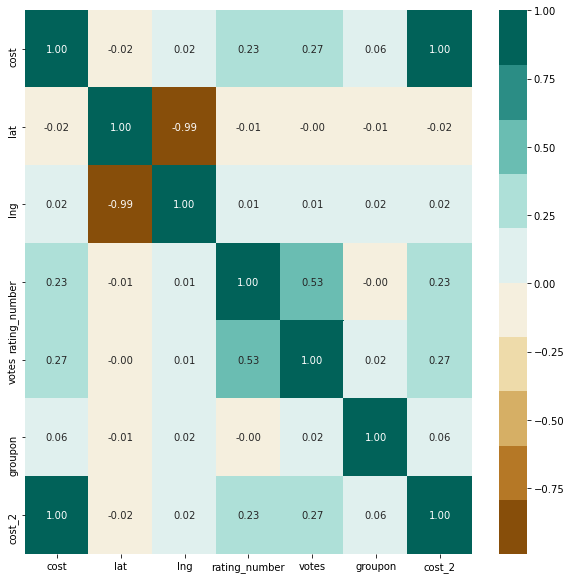

In [109]:
#Finding the corelation-matrix
corr_matrix = Sydney_food_df.corr()


fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f") #Plotting of Heat-map

plt.show()

In [110]:

#As "rating_number" is a target variable ,Removing Na values

Sydney_food_df= Sydney_food_df[Sydney_food_df["rating_number"].notnull()]

#Sydney_food_df = Sydney_food_df[Sydney_food_df["rating_text"].notnull()]

In [111]:
# using multibinarizer to do label encoding as each row of type column has mulktiple lables
MultiLabBin = MultiLabelBinarizer()

# we are creating different data-base to craete label encoding and joining with "Sydney_food_df" database.so our new database are
#Sydney_food_cleanDf
Sydney_food_cleanDf = Sydney_food_df.join(
    pd.DataFrame(MultiLabBin.fit_transform(Sydney_food_df['type']),
                   columns=MultiLabBin.classes_,
                   index=Sydney_food_df['type'].index))

In [112]:
# Finding unique values of rating text and applying label encoder according to the levels
Sydney_food_cleanDf['rating_text'].unique()

array(['Very Good', 'Excellent', 'Good', 'Average', 'Poor'], dtype=object)

In [113]:
lb = LabelEncoder()

SydneyDfLabelEncoded = lb.fit(Sydney_food_cleanDf['rating_text'])
SydneyDfLabelEncoded.classes_ = np.array(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])
Sydney_food_cleanDf['rating_text'] = SydneyDfLabelEncoded.transform(Sydney_food_cleanDf['rating_text'])

In [114]:
Sydney_food_cleanDf.columns

Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color', 'Bakery', 'Bar',
       'Beverage Shop', 'Café', 'Casual Dining', 'Club', 'Dessert Parlour',
       'Fast Food', 'Fine Dining', 'Food Court', 'Food Truck', 'Pub',
       'Wine Bar'],
      dtype='object')

In [115]:
#drop the type column as the one hot encoding has been performed on this column, and dropping all the categorical features 
#and creating a new dataframe for linear regression with only numerical features.

Sydney_food_LinearReg = Sydney_food_cleanDf.copy()

Sydney_food_LinearReg.drop(['cost_2','address','phone','link','title','color',
                        'cuisine_color','cuisine','lat','lng','subzone','type'], inplace=True, axis=1)



In [116]:
Sydney_food_LinearReg.columns

Index(['cost', 'rating_number', 'rating_text', 'votes', 'groupon', 'Bakery',
       'Bar', 'Beverage Shop', 'Café', 'Casual Dining', 'Club',
       'Dessert Parlour', 'Fast Food', 'Fine Dining', 'Food Court',
       'Food Truck', 'Pub', 'Wine Bar'],
      dtype='object')

In [117]:
# As 'votes' and 'cost' are not skewed so for regression I am taking log of these variable to normalise those variable

Sydney_food_LinearReg['logvotes'] = np.log(Sydney_food_LinearReg['votes'])
Sydney_food_LinearReg['logcost'] = np.log(Sydney_food_LinearReg['cost'])

Sydney_food_LinearReg.drop(['votes','cost','rating_text'], inplace=True, axis=1) #dropping 


In [118]:
## Choosing the x and y from the dataset
x = Sydney_food_LinearReg.drop('rating_number', axis =1)
y = Sydney_food_LinearReg['rating_number']

In [119]:
## Splitting the data 80:20 training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [120]:
y_train.head()

2178    3.5
2795    3.8
1548    3.8
883     4.0
5025    3.1
Name: rating_number, dtype: float64

# Linear-Regression

In [121]:
## Performing Linear Regression fitting the model and predicting on test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
model_LinReg = LinearRegression()

model_LinReg.fit(x_train, y_train) #Fitting the model

#Printing the R-sqaured , MSE and accuracy
print('R-Squared value for Linear Regression Model is : \n', model_LinReg.score(x_train, y_train))
y_pred = model_LinReg.predict(x_test) #Predicting using the test data
print('Mean-Squared-Error value for Linear Regression Model is : \n',mean_squared_error(y_test, y_pred))
print('Accuracy for Linear Regression Model is : \n', round(model_LinReg.score(x_train, y_train)*100,2))

R-Squared value for Linear Regression Model is : 
 0.6051186864948159
Mean-Squared-Error value for Linear Regression Model is : 
 0.08385940507520073
Accuracy for Linear Regression Model is : 
 60.51


# Gradiant Descent model

In [122]:
#Gradiant Descent model fitting and prediction
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



Sydney_food_GradDesc = Sydney_food_LinearReg.copy()
## Choosing the x and y 
x = Sydney_food_GradDesc.drop('rating_number', axis =1)
y = Sydney_food_GradDesc['rating_number']

## Splitting the data 80:20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model_GradDesc = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=825, tol=1e-3))

model_GradDesc.fit(x_train, y_train)

#Printing the R-sqaured , MSE and accuracy
print('R-Squared value for Gradient Descent Model is : \n', model_GradDesc.score(x_train, y_train))
y_pred = model_GradDesc.predict(x_test)
print('Root-Mean-Squared-Error value for Gradient Descent Model is : \n',mean_squared_error(y_test, y_pred))
print('Accuracy for Gradient Descent Model is : \n', round(model_GradDesc.score(x_train, y_train)*100,2))

R-Squared value for Gradient Descent Model is : 
 -4133158.464052409
Root-Mean-Squared-Error value for Gradient Descent Model is : 
 13671215.62159353
Accuracy for Gradient Descent Model is : 
 -413315846.41


# Binary Classification

In [123]:
# Replacing all the Poor and Average to Poor and rest of the type to excellent. 
Sydney_food_cleanDf_Bin = Sydney_food_cleanDf.copy()
Sydney_food_cleanDf_Bin['rating_text'] = np.where((Sydney_food_cleanDf_Bin['rating_text'] == 0)|(Sydney_food_cleanDf_Bin['rating_text'] == 1),
                           0, 1)


In [124]:
Sydney_food_cleanDf_Bin.drop(['cost_2','address','phone','link','title','color',
                           'cuisine_color','cuisine','lat','lng','subzone','type','rating_number'], inplace=True, axis=1)

In [125]:
Sydney_food_cleanDf_Bin.columns

Index(['cost', 'rating_text', 'votes', 'groupon', 'Bakery', 'Bar',
       'Beverage Shop', 'Café', 'Casual Dining', 'Club', 'Dessert Parlour',
       'Fast Food', 'Fine Dining', 'Food Court', 'Food Truck', 'Pub',
       'Wine Bar'],
      dtype='object')

In [126]:
#considering rating_text as the target variable
X = Sydney_food_cleanDf_Bin.drop('rating_text', axis =1)
y = Sydney_food_cleanDf_Bin['rating_text'] 

In [127]:
#split the dataset 80 and 20 percent training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0) #splittind dataset 80:20

In [128]:

#Normalize the data for numerical stability
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)

In [129]:
#initialising the dictionary with keys for 6 binary classification techniques
models = {}


# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support_Vector_Machines'] = LinearSVC(dual=False)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic_Regression'] = LogisticRegression()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random_Forest'] = RandomForestClassifier()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision_Trees'] = DecisionTreeClassifier()


# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K_Nearest_Neighbor'] = KNeighborsClassifier()


In [130]:
#calculating accuracy, precision and recall for all the 6 classification models
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    #Prepare Confusion Matrix for each model
    #ConfMatx[key] = confusion_matrix(y_test, predictions, labels=models[key].classes_)

In [131]:
#Printing accuracy, precision and recall values for all the binary classification models.
parameter_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
parameter_model['Accuracy'] = accuracy.values()
parameter_model['Precision'] = precision.values()
parameter_model['Recall'] = recall.values()

parameter_model

Accuracy  Precision    Recall
Support_Vector_Machines  0.814196   0.558943  0.846154
Logistic_Regression      0.820459   0.591463  0.836207
Random_Forest            0.801670   0.733740  0.700971
Decision_Trees           0.770355   0.646341  0.670886
K_Nearest_Neighbor       0.803758   0.731707  0.705882

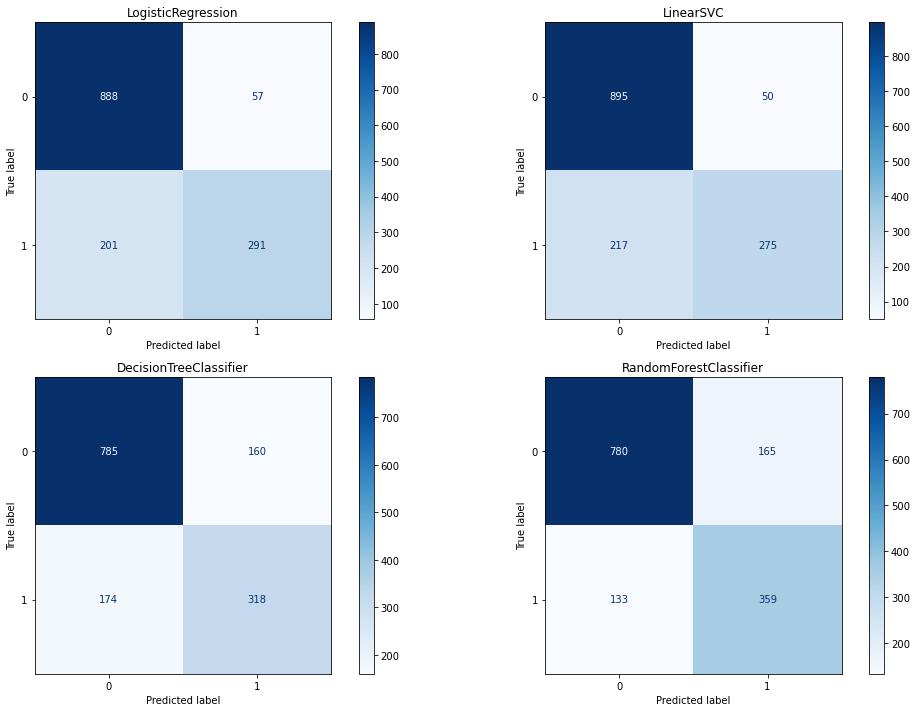

In [132]:
#plotting confusion matrix for all the models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))



classifiers = [LogisticRegression(), 
               LinearSVC(dual=False),
               DecisionTreeClassifier(), 
               RandomForestClassifier(),
               
               KNeighborsClassifier()]


for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(X_train, y_train)
    predictions = cls.predict(X_test)
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=cls.classes_)
    ax.title.set_text(type(cls).__name__)
    
plt.tight_layout()  
plt.show() 